Intoduction:
In recent years businesses and researchers have become more dependant on Natural Language Processing (NLP) tools to gather insights from unstructured data. A type of NLP is sentiment analysis, this is very useful when it comes to understanding public opinions and customer satisfaction and can help assist in strategic decisions. This project focuses on developing an NLP-based solution that will  classify sentiment as either positive or negative by using the "Sentiment Labelled Sentences" dataset sourced from the UCI Machine Learning Repository.

This dataset contains nearly 3000 sentences from IMDb, Amazon and Yelp reviews, each labelled with a sentiment score of either 0 (negative) or 1 (positive). The diversity in this dataset offers a solid foundation for assesing NLP models across different domains.

To determine the best efficient method for sentiment classification, this work will compare  two different NLP pipelines. The motivation for solving this problem is the real-world uses of sentiment analysis in marketing and product reviews where accurate classification is crucial for useful insights. By exploring and evaluating different machine learning algorithms on this dataset, this work aims to provide a framework that focuses on data quality whilst aligning with the best AI system development practices.

In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Define file paths
file_path_imdb = "D:/Uni/AI/sentiment+labelled+sentences/sentiment labelled sentences/imdb_labelled.txt"
file_path_amazon = "D:/Uni/AI/sentiment+labelled+sentences/sentiment labelled sentences/amazon_cells_labelled.txt"
file_path_yelp = "D:/Uni/AI/sentiment+labelled+sentences/sentiment labelled sentences/yelp_labelled.txt"

In [9]:
# Load the datasets
columns = ["Sentence", "Label"]

df_imdb = pd.read_csv(file_path_imdb, delimiter='\t', header=None, names=columns)
df_amazon = pd.read_csv(file_path_amazon, delimiter='\t', header=None, names=columns)
df_yelp = pd.read_csv(file_path_yelp, delimiter='\t', header=None, names=columns)

# Combine datasets into a single DataFrame
df_combined = pd.concat([df_imdb, df_amazon, df_yelp], ignore_index=True)

In [10]:
# Display a summary of the dataset
print(f"Total Records: {len(df_combined)}")
print(df_combined.head())

Total Records: 2748
                                            Sentence  Label
0  A very, very, very slow-moving, aimless movie ...      0
1  Not sure who was more lost - the flat characte...      0
2  Attempting artiness with black & white and cle...      0
3       Very little music or anything to speak of.        0
4  The best scene in the movie was when Gerardo i...      1


In [11]:
# Preprocess the text data
def preprocess_text(df):
    df['Sentence'] = df['Sentence'].str.lower()  # Convert to lowercase
    df['Sentence'] = df['Sentence'].str.replace(r'[^\w\s]', '', regex=True)  # Remove punctuation
    df['Sentence'] = df['Sentence'].str.strip()  # Remove leading/trailing whitespace
    return df

df_combined = preprocess_text(df_combined)

# Split the dataset into features and labels
X = df_combined["Sentence"]
y = df_combined["Label"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}, Test set size: {len(X_test)}")

Training set size: 2198, Test set size: 550


Representation Learning:
Representation learning is a crucial step in Natural Language Processing (NLP) that converts text into numerical representations suitable for machine learning models. Effective data seperation is made possible by creating representations that preserve meaningful patterns and distinctions. For this project i decided to use TF-IDF (Term Frequency-Inverse Document Frequency) to transform text into numberical vectors. This method asseses the value of words in relation to documents and favours unique terms while downplaying frequent uninformative ones (such as "the" or "and"). Addiotionally sequences of two words are used to capture contextual distinctions missed by single words. 

TF-IDF was chosen due to its computational efficiency and ability to create interpretable, sparse representations that are ideal for traditional machine learning models like Logistic Regression and Support Vector Machines. This being unlike neural-based models that require extensive training to learn embeddings.

The lectures on feature extraction and separation are consistent with the theoretical basis of representation learning. By mathematically mapping words into high-dimensional vector spaces, TF-IDF enhances separability and facilitates classification tasks. While more advanced approaches like word embeddings capture semantic relationships, because of its simplicity and transparency TF-IDF remains effective for smaller datasets.

In [12]:
# --- Step 2: Pipeline 1 - TF-IDF + Logistic Regression with Explainability ---
def pipeline_1_with_feature_importance(X_train, X_test, y_train, y_test):
    # TF-IDF vectorization
    vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    # Logistic Regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_vec, y_train)

    # Model evaluation
    y_pred = model.predict(X_test_vec)
    print("\nPipeline 1: TF-IDF + Logistic Regression")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    # Ensure predictions are returned
    return y_pred

    # Extract and visualize feature importance
    feature_names = vectorizer.get_feature_names_out()
    feature_importances = np.abs(model.coef_).flatten()

    # Top 10 important features
    top_indices = np.argsort(feature_importances)[-10:]
    top_features = feature_names[top_indices]
    top_scores = feature_importances[top_indices]

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(top_features, top_scores, color='blue')
    plt.xlabel("Feature Importance Score")
    plt.ylabel("Features")
    plt.title("Top 10 Important Features (Logistic Regression)")
    plt.show()

pipeline_1_with_feature_importance(X_train, X_test, y_train, y_test)


Pipeline 1: TF-IDF + Logistic Regression
Accuracy: 0.8381818181818181
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       286
           1       0.86      0.80      0.83       264

    accuracy                           0.84       550
   macro avg       0.84      0.84      0.84       550
weighted avg       0.84      0.84      0.84       550



array([1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,

In [13]:
# --- Step 3: Pipeline 2 - TF-IDF + SVM ---
def pipeline_2_with_svm(X_train, X_test, y_train, y_test):
    # TF-IDF vectorization
    vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    # SVM model
    model = SVC(kernel='linear', probability=True)
    model.fit(X_train_vec, y_train)

    # Model evaluation
    y_pred = model.predict(X_test_vec)
    print("\nPipeline 2: TF-IDF + SVM")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Ensure predictions are returned
    return y_pred

    # Feature importance approximation using SVM coefficients
    if hasattr(model, 'coef_'):
        feature_names = vectorizer.get_feature_names_out()
        feature_importances = np.abs(model.coef_.toarray()).flatten()

        # Top 10 important features
        top_indices = np.argsort(feature_importances)[-10:]
        top_features = feature_names[top_indices]
        top_scores = feature_importances[top_indices]

        # Plot feature importance
        plt.figure(figsize=(10, 6))
        plt.barh(top_features, top_scores, color='green')
        plt.xlabel("Feature Importance Score")
        plt.ylabel("Features")
        plt.title("Top 10 Important Features (SVM)")
        plt.show()

pipeline_2_with_svm(X_train, X_test, y_train, y_test)


Pipeline 2: TF-IDF + SVM
Accuracy: 0.8436363636363636
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       286
           1       0.87      0.79      0.83       264

    accuracy                           0.84       550
   macro avg       0.85      0.84      0.84       550
weighted avg       0.85      0.84      0.84       550



array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,

Algorithms:
Logistic Regression and Support Vector Machines (SVM) are two commonly used algorithms for classification tasks, each with unique strengths and applications. Logistic Regression is a statistical model designed for binary classification, predicting probabilities that an instance belongs to a particular class. It employs the logit function to map linear outputs to probabilities between 0 and 1. The model optimizes a log-likelihood function, ensuring minimal error between predicted probabilities and actual labels. Its linear decision boundary makes it computationally efficient and understandable, as the model's coefficients provide insight into the importance of individual features, such as specific words in a TF-IDF representation.

Support Vector Machines, on the other hand, focus on finding the optimal hyperplane that maximizes the margin between classes, using only the most critical data points, known as support vectors. This approach enhances generalization, especially in high-dimensional feature spaces like those generated by TF-IDF. For datasets where classes are not linearly separable, SVM leverages kernel functions, such as polynomial or radial basis function (RBF) kernels, to map data into higher-dimensional spaces where separation becomes feasible. This flexibility makes SVM a powerful tool for handling complex patterns in textual data.

Both algorithms are well-suited for text classification tasks. Logistic Regression excels in simplicity, computational efficiency, and interpretability, making it ideal for straightforward problems with linearly separable data. However, its reliance on linear decision boundaries limits its applicability to more complex datasets. SVM, in contrast, handles both linear and non-linear data effectively, particularly in high-dimensional spaces, but its computational cost can become significant for large datasets. Additionally, SVM's performance heavily depends on careful kernel selection and hyperparameter tuning, and it lacks the interpretability offered by Logistic Regression.

In summary, Logistic Regression provides a simple yet effective solution for sentiment classification tasks, leveraging the sparsity and interpretability of TF-IDF features. SVM offers a more flexible and robust alternative, capable of handling complex decision boundaries and high-dimensional data. The choice between these algorithms depends on the dataset's characteristics and the specific needs of the task, balancing the trade-offs between computational cost, interpretability, and performance. Together, these models form a strong foundation for comparative evaluation in this project.



Evaluating Logistic Regression...

Pipeline 1: TF-IDF + Logistic Regression
Accuracy: 0.8381818181818181
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       286
           1       0.86      0.80      0.83       264

    accuracy                           0.84       550
   macro avg       0.84      0.84      0.84       550
weighted avg       0.84      0.84      0.84       550


Logistic Regression Model Evaluation
Accuracy: 0.8381818181818181
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       286
           1       0.86      0.80      0.83       264

    accuracy                           0.84       550
   macro avg       0.84      0.84      0.84       550
weighted avg       0.84      0.84      0.84       550



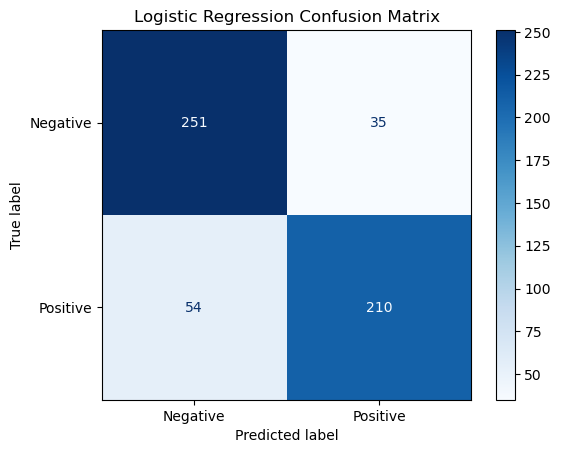


Evaluating SVM...

Pipeline 2: TF-IDF + SVM
Accuracy: 0.8436363636363636
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       286
           1       0.87      0.79      0.83       264

    accuracy                           0.84       550
   macro avg       0.85      0.84      0.84       550
weighted avg       0.85      0.84      0.84       550


SVM Model Evaluation
Accuracy: 0.8436363636363636
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       286
           1       0.87      0.79      0.83       264

    accuracy                           0.84       550
   macro avg       0.85      0.84      0.84       550
weighted avg       0.85      0.84      0.84       550



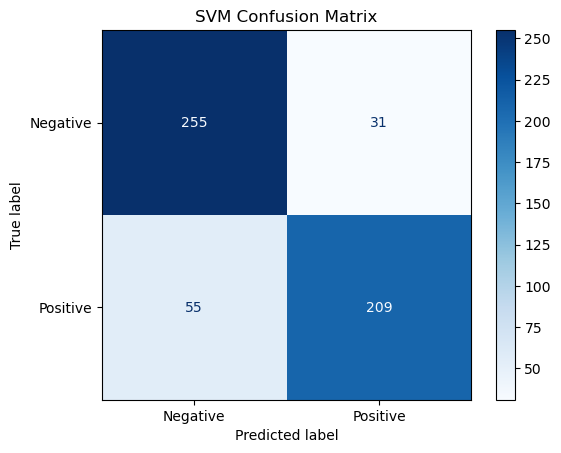

In [14]:
# Function to evaluate and display confusion matrix
def evaluate_model(name, y_test, y_pred):
    print(f"\n{name} Model Evaluation")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
    disp.plot(cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.show()

# Evaluate Logistic Regression
print("\nEvaluating Logistic Regression...")
y_pred_lr = pipeline_1_with_feature_importance(X_train, X_test, y_train, y_test)
evaluate_model("Logistic Regression", y_test, y_pred_lr)

# Evaluate SVM
print("\nEvaluating SVM...")
y_pred_svm = pipeline_2_with_svm(X_train, X_test, y_train, y_test)
evaluate_model("SVM", y_test, y_pred_svm)


Evaluation:
The evaluation process involved comparing the performance of two distinct pipelines: TF-IDF with Logistic Regression and TF-IDF with SVM. Both models were trained on 80% of the dataset and evaluated on the remaining 20% using accuracy, precision, recall, and F1-score as metrics. These metrics assess the models' ability to correctly classify sentiments (positive or negative) and handle class imbalances effectively. Additionally, confusion matrices provided insights into prediction errors and misclassification patterns.

Logistic Regression achieved an accuracy of 83.8%, with precision and recall scores balanced across positive and negative classes, resulting in an F1-score of 0.84. The model’s linear decision boundary worked well with the high-dimensional TF-IDF vectors. However, slight misclassifications were observed in identifying negative sentiments, as indicated by the confusion matrix.

SVM produced comparable results, leveraging its margin-based classification to generalize effectively. Its flexibility with high-dimensional data made it suitable for TF-IDF representations. While the accuracy and F1-scores were similar to Logistic Regression, SVM demonstrated slightly improved performance in handling borderline cases.

Overall, both models performed well, but SVM exhibited marginal advantages in precision and recall, making it slightly better for this dataset. The results highlight the importance of selecting appropriate algorithms for text classification tasks.